#Data Loading 

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
"""
inv_num=[]
inv_day=[]
inv_amt=[]
reg=[]
cust=[]
clear=[]
due=[]
for i in range(200):
  inv_num.append('1001'+str(random.randint(100,900)))
  inv_day.append(str(random.randint(1,30))+'-'+'05'+'-2020')
  due.append(str(random.randint(1,30))+str(random.randint(5,7))+'2020.0')
  clear.append(str(random.randint(1,30))+str(random.randint(5,7))+'2020.0')
  inv_amt.append(str(random.randint(1,1000))+'.'+str(random.randint(1,99)))
  reg.append(np.random.choice(['NA','SA','NZ','LATAM']))
  cust.append(np.random.choice(['Hooli','EndFrame','Pieper_chat','GROW_MORE','Riot','Laxmi_Funds_25days']))
"""

In [ ]:
df_1=pd.DataFrame({'INVOICE_NUMBER':inv_num,'Creation_date':inv_day,'Amount($)':inv_amt,'Region':reg,'Due_date':due,'CLEARING_DATE':clear,'CUSTOMER_NAME':cust,'Business_Area':reg})

In [ ]:
df_1.head()

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area
0,1001878,26-05-2020,595.51,SA,1252020.0,2852020.0,EndFrame,SA
1,1001400,19-05-2020,203.45,NA,2852020.0,2752020.0,Riot,NA
2,1001627,18-05-2020,137.3,NA,3072020.0,752020.0,Hooli,NA
3,1001189,24-05-2020,262.57,SA,1862020.0,662020.0,Pieper_chat,SA
4,1001816,29-05-2020,238.5,SA,2252020.0,772020.0,Riot,SA


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INVOICE_NUMBER  200 non-null    object
 1   Creation_date   200 non-null    object
 2   Amount($)       200 non-null    object
 3   Region          200 non-null    object
 4   Due_date        200 non-null    object
 5   CLEARING_DATE   200 non-null    object
 6   CUSTOMER_NAME   200 non-null    object
 7   Business_Area   200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


In [ ]:
df_1.isnull()

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False


In [ ]:
df_1.isnull().any()

INVOICE_NUMBER    False
Creation_date     False
Amount($)         False
Region            False
Due_date          False
CLEARING_DATE     False
CUSTOMER_NAME     False
Business_Area     False
dtype: bool

#Sanity / Pre Processing

validating the Dtype

In [ ]:
df_1['Creation_date'].head()

0    26-05-2020
1    19-05-2020
2    18-05-2020
3    24-05-2020
4    29-05-2020
Name: Creation_date, dtype: object

In [ ]:
df_1['Creation_date']=pd.to_datetime(df_1['Creation_date'],format='%Y%m%d')

ValueError: ignored

In [ ]:
df_1['Creation_date']=pd.to_datetime(df_1['Creation_date'],format='%d-%m-%Y')

In [ ]:
df_1['Creation_date'].head()

0   2020-05-26
1   2020-05-19
2   2020-05-18
3   2020-05-24
4   2020-05-29
Name: Creation_date, dtype: datetime64[ns]

In [ ]:
df_1['CLEARING_DATE']

0      2852020.0
1      2752020.0
2       752020.0
3       662020.0
4       772020.0
         ...    
195    2952020.0
196     152020.0
197     572020.0
198    1652020.0
199     872020.0
Name: CLEARING_DATE, Length: 200, dtype: object

In [ ]:
df_1['CLEARING_DATE']=pd.to_datetime(df_1['CLEARING_DATE'].astype('float'),format='%d%m%Y')
df_1['Due_date']=pd.to_datetime(df_1['Due_date'].astype('float'),format='%d%m%Y')

In [ ]:
df_1['CLEARING_DATE'].head()

0   2020-05-28
1   2020-05-27
2   2020-05-07
3   2020-06-06
4   2020-07-07
Name: CLEARING_DATE, dtype: datetime64[ns]

In [ ]:
df_1['Due_date'].head()

0   2020-05-12
1   2020-05-28
2   2020-07-30
3   2020-06-18
4   2020-05-22
Name: Due_date, dtype: datetime64[ns]

#Train Test Split 

In [ ]:
#df_1 <- Train

In [ ]:
df_1['delay']=(df_1['CLEARING_DATE']-df_1['Due_date']).dt.days

In [ ]:
df_1.sort_values(by='CREATION_DATE',inplace=True) #use document_date_norm.1

In [ ]:
df_1.shape

(200, 9)

In [ ]:
test1=df_1.tail(40)
val=test1.iloc[:20,:]

In [ ]:
test1=test1.tail(20)

In [ ]:
val.shape,test1.shape

((20, 9), (20, 9))

In [ ]:
set(val.index).intersection(set(test1.index))

set()

In [ ]:
r=len(df_1)-40

In [ ]:
df_1=df_1.head(r)
len(df_1)

160

#EDA (Data Analysis)

In [ ]:
df_1['INVOICE_NUMBER'].nunique()

147

In [ ]:
df_1.shape[0]

160

In [ ]:
df_1['Region'].unique()

array(['SA', 'NA', 'LATAM', 'NZ'], dtype=object)

check that sufficient data is there ...

In [ ]:
df_1['Region'].value_counts()

NA       48
SA       44
LATAM    36
NZ       32
Name: Region, dtype: int64

In [ ]:
df_1.shape

(160, 9)

In [ ]:
df_1[df_1['CLEARING_DATE']<df_1['Creation_date']].shape

(35, 9)

In [ ]:
df_1[df_1['Due_date']<df_1['Creation_date']].shape

(19, 9)

In [ ]:
df_1=df_1.drop(index=df_1[df_1['CLEARING_DATE']<df_1['Creation_date']].index)
df_1=df_1.drop(index=df_1[df_1['Due_date']<df_1['Creation_date']].index)

In [ ]:
df_1.shape[0]

114

In [ ]:
df_1['Creation_date'].max()

Timestamp('2020-05-30 00:00:00')

In [ ]:
df_1['Creation_date'].min()

Timestamp('2020-05-01 00:00:00')

In [ ]:
df_1['delay']=(df_1['CLEARING_DATE']-df_1['Due_date']).dt.days

In [ ]:
df_1['delay']

72    -25
179    -9
39    -52
135   -47
19    -61
       ..
8      12
197    33
199   -13
93      9
150   -12
Name: delay, Length: 114, dtype: int64

In [ ]:
df_1.loc[:,['CUSTOMER_NAME','Creation_date','Due_date','CLEARING_DATE','delay']]

,CUSTOMER_NAME,Creation_date,Due_date,CLEARING_DATE,delay
72,Riot,2020-05-01,2020-06-01,2020-05-07,-25
179,Pieper_chat,2020-05-04,2020-05-19,2020-05-10,-9
39,EndFrame,2020-05-09,2020-07-03,2020-05-12,-52
135,Hooli,2020-05-08,2020-06-28,2020-05-12,-47
19,GROW_MORE,2020-05-03,2020-07-13,2020-05-13,-61
...,...,...,...,...,...
8,Riot,2020-05-11,2020-06-22,2020-07-04,12
197,GROW_MORE,2020-05-03,2020-06-02,2020-07-05,33
199,Laxmi_Funds_25days,2020-05-09,2020-07-21,2020-07-08,-13
93,Riot,2020-05-29,2020-06-29,2020-07-08,9


In [ ]:
df_1['Weekday']=df_1['Creation_date'].dt.weekday

In [ ]:
def catog_delay(x):
  if x<=0:
    return 0
  else: 
    return 1

In [ ]:
df_1['delay'].describe()

count    114.000000
mean     -15.622807
std       24.587352
min      -69.000000
25%      -31.500000
50%      -14.500000
75%        0.750000
max       42.000000
Name: delay, dtype: float64

mapper

In [ ]:
df_1

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Weekday
72,1001267,2020-05-01,360.7,LATAM,2020-06-01,2020-05-07,Riot,LATAM,-25,4
179,1001675,2020-05-04,668.92,LATAM,2020-05-19,2020-05-10,Pieper_chat,LATAM,-9,0
39,1001731,2020-05-09,59.34,NA,2020-07-03,2020-05-12,EndFrame,NA,-52,5
135,1001456,2020-05-08,922.6,SA,2020-06-28,2020-05-12,Hooli,SA,-47,4
19,1001782,2020-05-03,582.48,NA,2020-07-13,2020-05-13,GROW_MORE,NA,-61,6
...,...,...,...,...,...,...,...,...,...,...
8,1001605,2020-05-11,277.72,NA,2020-06-22,2020-07-04,Riot,NA,12,0
197,1001694,2020-05-03,249.16,SA,2020-06-02,2020-07-05,GROW_MORE,SA,33,6
199,1001302,2020-05-09,247.41,NA,2020-07-21,2020-07-08,Laxmi_Funds_25days,NA,-13,5
93,1001281,2020-05-29,468.72,NZ,2020-06-29,2020-07-08,Riot,NZ,9,4


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


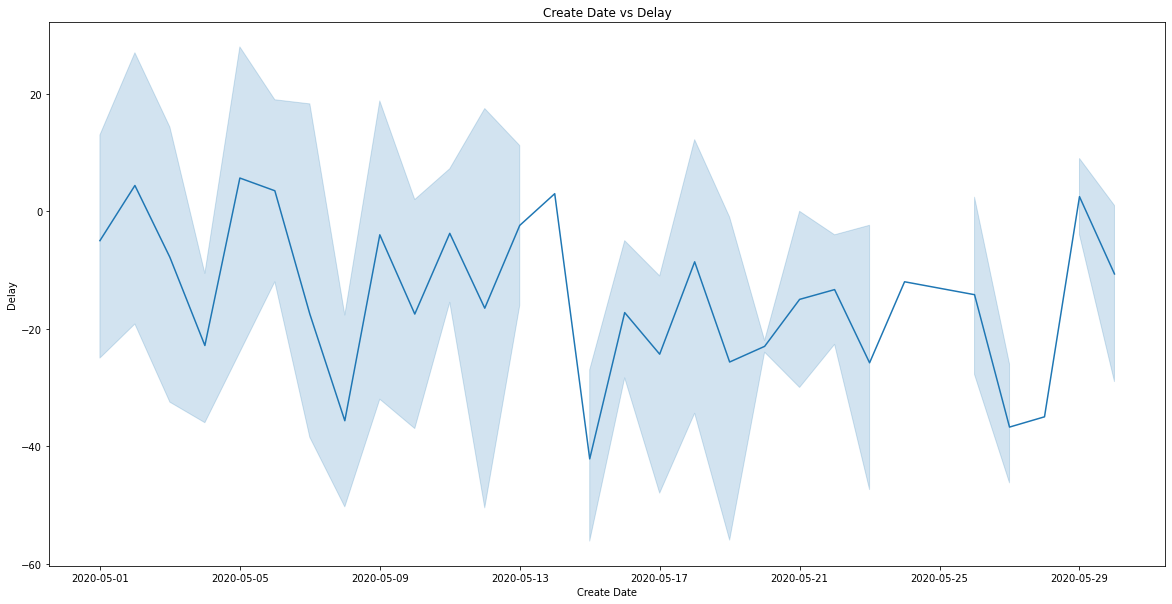

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(df_1['Creation_date'], df_1['delay'])
plt.xlabel("Create Date")
plt.ylabel("Delay")
plt.title("Create Date vs Delay")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


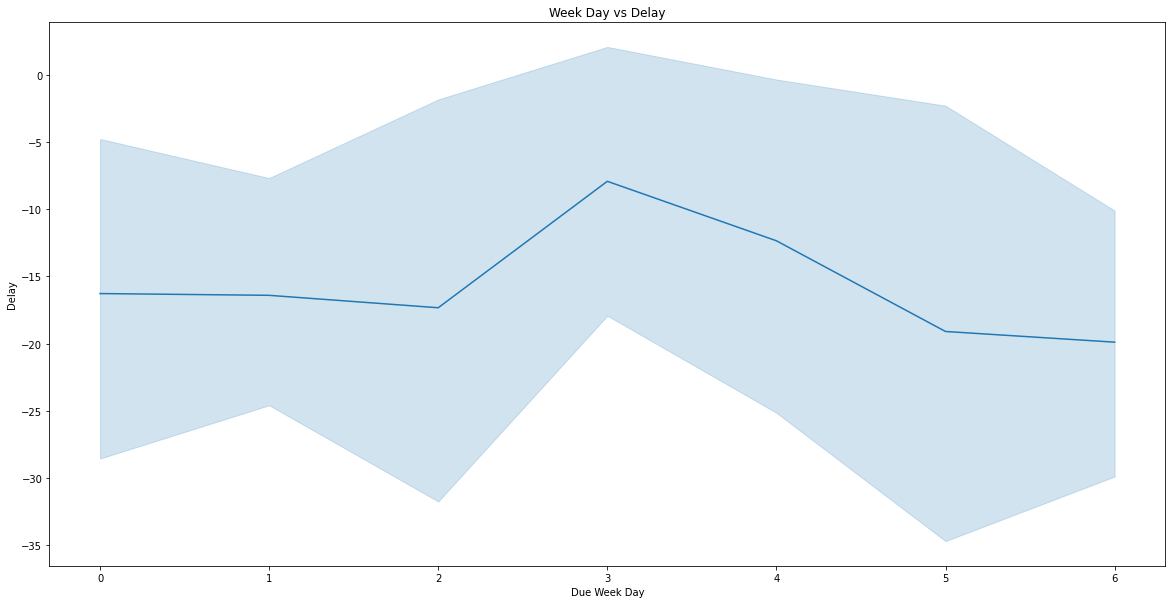

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(df_1['Due_date'].dt.dayofweek, df_1['delay'])
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


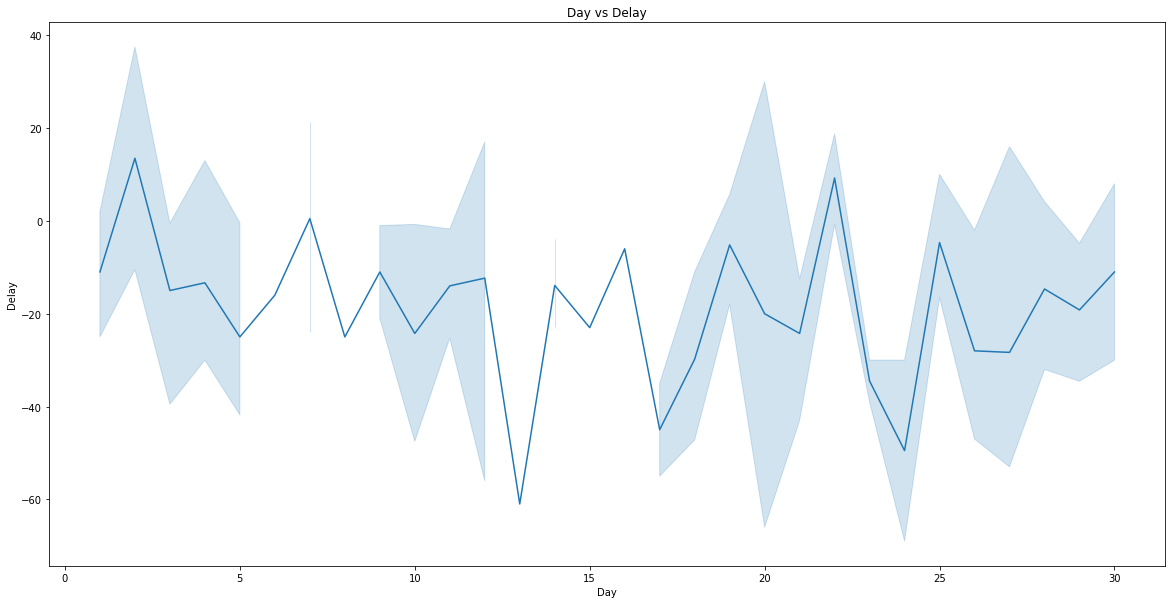

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(df_1['Due_date'].dt.day, df_1['delay'])
plt.xlabel("Day")
plt.ylabel("Delay")
plt.title("Day vs Delay")
plt.show()

#Feature Engineering 

Mapper 

In [ ]:
map_cust=df_1.groupby("CUSTOMER_NAME")['delay'].mean().to_dict()

In [ ]:
map_cust

{'EndFrame': -19.6,
 'GROW_MORE': -13.833333333333334,
 'Hooli': -4.583333333333333,
 'Laxmi_Funds_25days': -17.894736842105264,
 'Pieper_chat': -13.5,
 'Riot': -20.047619047619047}

In [ ]:
df_1['Cust Mean Delay']=df_1['CUSTOMER_NAME'].map(map_cust)
df_1

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Weekday,Cust Mean Delay
72,1001267,2020-05-01,360.7,LATAM,2020-06-01,2020-05-07,Riot,LATAM,-25,4,-20.047619
179,1001675,2020-05-04,668.92,LATAM,2020-05-19,2020-05-10,Pieper_chat,LATAM,-9,0,-13.500000
39,1001731,2020-05-09,59.34,NA,2020-07-03,2020-05-12,EndFrame,NA,-52,5,-19.600000
135,1001456,2020-05-08,922.6,SA,2020-06-28,2020-05-12,Hooli,SA,-47,4,-4.583333
19,1001782,2020-05-03,582.48,NA,2020-07-13,2020-05-13,GROW_MORE,NA,-61,6,-13.833333
...,...,...,...,...,...,...,...,...,...,...,...
8,1001605,2020-05-11,277.72,NA,2020-06-22,2020-07-04,Riot,NA,12,0,-20.047619
197,1001694,2020-05-03,249.16,SA,2020-06-02,2020-07-05,GROW_MORE,SA,33,6,-13.833333
199,1001302,2020-05-09,247.41,NA,2020-07-21,2020-07-08,Laxmi_Funds_25days,NA,-13,5,-17.894737
93,1001281,2020-05-29,468.72,NZ,2020-06-29,2020-07-08,Riot,NZ,9,4,-20.047619


In [ ]:
val.columns

Index(['INVOICE_NUMBER', 'Creation_date', 'Amount($)', 'Region', 'Due_date',
       'CLEARING_DATE', 'CUSTOMER_NAME', 'Business_Area', 'delay'],
      dtype='object')

In [ ]:
val['Cust Mean Delay']=val['CUSTOMER_NAME'].map(map_cust)
val['Cust Mean Delay'][val['Cust Mean Delay'].isnull()]= val['delay'].mean()
val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Cust Mean Delay
102,1001898,2020-05-02,672.15,NA,2020-05-15,2020-07-09,Laxmi_Funds_25days,NA,55,-17.894737
12,1001159,2020-05-27,236.41,LATAM,2020-05-23,2020-07-09,Hooli,LATAM,47,-4.583333
183,1001450,2020-05-06,384.21,LATAM,2020-07-01,2020-07-10,Riot,LATAM,9,-20.047619
175,1001615,2020-05-04,261.21,NA,2020-05-28,2020-07-10,EndFrame,NA,43,-19.600000
173,1001787,2020-05-04,989.56,LATAM,2020-06-22,2020-07-10,EndFrame,LATAM,18,-19.600000
178,1001205,2020-05-05,922.51,SA,2020-07-02,2020-07-11,EndFrame,SA,9,-19.600000
48,1001344,2020-05-10,79.47,SA,2020-05-27,2020-07-11,Riot,SA,45,-20.047619
90,1001595,2020-05-23,172.50,NA,2020-05-10,2020-07-13,Hooli,NA,64,-4.583333
98,1001178,2020-05-03,701.78,NA,2020-07-02,2020-07-13,Hooli,NA,11,-4.583333
115,1001778,2020-05-14,675.80,LATAM,2020-07-11,2020-07-13,Laxmi_Funds_25days,LATAM,2,-17.894737


In [ ]:
df_1['Week_is_3']=np.where(df_1['Due_date'].dt.dayofweek==3,1,0)

In [ ]:
df_1

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Weekday,Cust Mean Delay,Week_is_5,Amount Std,Week_is_3
72,1001267,2020-05-01,360.7,LATAM,2020-06-01,2020-05-07,Riot,LATAM,-25,4,-20.047619,0,-0.602936,0
179,1001675,2020-05-04,668.92,LATAM,2020-05-19,2020-05-10,Pieper_chat,LATAM,-9,0,-13.500000,0,0.541445,0
39,1001731,2020-05-09,59.34,NA,2020-07-03,2020-05-12,EndFrame,NA,-52,5,-19.600000,0,-1.721848,0
135,1001456,2020-05-08,922.6,SA,2020-06-28,2020-05-12,Hooli,SA,-47,4,-4.583333,0,1.483327,0
19,1001782,2020-05-03,582.48,NA,2020-07-13,2020-05-13,GROW_MORE,NA,-61,6,-13.833333,0,0.220505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1001605,2020-05-11,277.72,NA,2020-06-22,2020-07-04,Riot,NA,12,0,-20.047619,0,-0.911031,0
197,1001694,2020-05-03,249.16,SA,2020-06-02,2020-07-05,GROW_MORE,SA,33,6,-13.833333,0,-1.017070,0
199,1001302,2020-05-09,247.41,NA,2020-07-21,2020-07-08,Laxmi_Funds_25days,NA,-13,5,-17.894737,0,-1.023568,0
93,1001281,2020-05-29,468.72,NZ,2020-06-29,2020-07-08,Riot,NZ,9,4,-20.047619,0,-0.201872,0


In [ ]:
val['Week_is_5']=np.where(val['Due_date'].dt.dayofweek==3,1,0)
val.head(5)

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Cust Mean Delay,Week_is_5,Amount Std
102,1001898,2020-05-02,672.15,NA,2020-05-15,2020-07-09,Laxmi_Funds_25days,NA,55,-17.894737,0,0.553438
12,1001159,2020-05-27,236.41,LATAM,2020-05-23,2020-07-09,Hooli,LATAM,47,-4.583333,0,-1.064409
183,1001450,2020-05-06,384.21,LATAM,2020-07-01,2020-07-10,Riot,LATAM,9,-20.047619,0,-0.515647
175,1001615,2020-05-04,261.21,NA,2020-05-28,2020-07-10,EndFrame,NA,43,-19.600000,1,-0.972330
173,1001787,2020-05-04,989.56,LATAM,2020-06-22,2020-07-10,EndFrame,LATAM,18,-19.600000,0,1.731941


In [ ]:
#Standardization of Amount Column
col_names = ['Amount($)']
features = df_1[col_names]
features1 = val[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
features_val = scaler.transform(features1.values)

df_1['Amount Std'] = features
val['Amount Std'] =  features_val

In [ ]:
df_1.head(5)

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Weekday,Cust Mean Delay,Week_is_5,Amount Std,Week_is_3
72,1001267,2020-05-01,360.7,LATAM,2020-06-01,2020-05-07,Riot,LATAM,-25,4,-20.047619,0,-0.602936,0
179,1001675,2020-05-04,668.92,LATAM,2020-05-19,2020-05-10,Pieper_chat,LATAM,-9,0,-13.500000,0,0.541445,0
39,1001731,2020-05-09,59.34,NA,2020-07-03,2020-05-12,EndFrame,NA,-52,5,-19.600000,0,-1.721848,0
135,1001456,2020-05-08,922.6,SA,2020-06-28,2020-05-12,Hooli,SA,-47,4,-4.583333,0,1.483327,0
19,1001782,2020-05-03,582.48,NA,2020-07-13,2020-05-13,GROW_MORE,NA,-61,6,-13.833333,0,0.220505,0


In [ ]:
val.head(5)

,INVOICE_NUMBER,Creation_date,Amount($),Region,Due_date,CLEARING_DATE,CUSTOMER_NAME,Business_Area,delay,Cust Mean Delay,Week_is_5,Amount Std
102,1001898,2020-05-02,672.15,NA,2020-05-15,2020-07-09,Laxmi_Funds_25days,NA,55,-17.894737,0,0.553438
12,1001159,2020-05-27,236.41,LATAM,2020-05-23,2020-07-09,Hooli,LATAM,47,-4.583333,0,-1.064409
183,1001450,2020-05-06,384.21,LATAM,2020-07-01,2020-07-10,Riot,LATAM,9,-20.047619,0,-0.515647
175,1001615,2020-05-04,261.21,NA,2020-05-28,2020-07-10,EndFrame,NA,43,-19.600000,1,-0.972330
173,1001787,2020-05-04,989.56,LATAM,2020-06-22,2020-07-10,EndFrame,LATAM,18,-19.600000,0,1.731941
